In [ ]:
# Make sure to have the server side running in V-REP: 
# in a child script of a V-REP scene, add following command
# to be executed just once, at simulation start:
#
# simRemoteApi.start(19999)
#
# then start simulation, and run this program.
#
# IMPORTANT: for each successful call to simxStart, there
# should be a corresponding call to simxFinish at the end!
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from PIL import Image
import array
try:
    import vrep
except:
    print ('--------------------------------------------------------------')
    print ('"vrep.py" could not be imported. This means very probably that')
    print ('either "vrep.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "vrep.py"')
    print ('--------------------------------------------------------------')
    print ('')

import time

print ('Program started')
vrep.simxFinish(-1) # just in case, close all opened connections
clientID=vrep.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to V-REP
if clientID!=-1:
    print ('Connected to remote API server')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res,objs=vrep.simxGetObjects(clientID,vrep.sim_handle_all,vrep.simx_opmode_blocking)
    if res==vrep.simx_return_ok:
        print ('Number of objects in the scene: ',len(objs))
    else:
        print ('Remote API function call returned with error code: ',res)
    err,hand = vrep.simxGetObjectHandle(clientID,'Pioneer_p3dx_leftMotor',vrep.simx_opmode_blocking)
    err, hand2 =  vrep.simxGetObjectHandle(clientID,'Pioneer_p3dx_rightMotor',vrep.simx_opmode_blocking)
    res,v0=vrep.simxGetObjectHandle(clientID,'kinect_rgb',vrep.simx_opmode_oneshot_wait)
    res,resolution,image=vrep.simxGetVisionSensorImage(clientID,v0,0,vrep.simx_opmode_streaming)


    # Now retrieve streaming data (i.e. in a non-blocking fashion):
    startTime=time.time()
    vrep.simxGetIntegerParameter(clientID,vrep.sim_intparam_mouse_x,vrep.simx_opmode_streaming) # Initialize streaming
    while True:
        err = vrep.simxSetJointTargetVelocity(clientID,hand,1.0,
vrep.simx_opmode_streaming)
        err = vrep.simxSetJointTargetVelocity(clientID,hand2,0.0,
vrep.simx_opmode_streaming)
        res,resolution,image=vrep.simxGetVisionSensorImage(clientID,v0,0,vrep.simx_opmode_buffer)
        if res == vrep.simx_return_ok:
            print("image OK!!!")
            img = np.array(image,dtype=np.uint8)
            img.resize([resolution[1],resolution[0],3])
            img = cv2.flip(img, 0)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)         
            cv2.imshow('image',img)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # Now send some data to V-REP in a non-blocking fashion:
    vrep.simxAddStatusbarMessage(clientID,'Hello V-REP!',vrep.simx_opmode_oneshot)

    # Before closing the connection to V-REP, make sure that the last command sent out had time to arrive. You can guarantee this with (for example):
    vrep.simxGetPingTime(clientID)

    # Now close the connection to V-REP:
    vrep.simxFinish(clientID)
else:
    print ('Failed connecting to remote API server')
print ('Program ended')
plt.imshow(image)
plt.show()

Program started
Connected to remote API server
Number of objects in the scene:  65
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image OK!!!
image

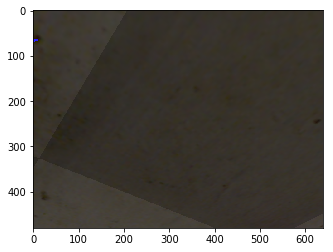

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [4]:
image.shape

(480, 640, 3)